

# Project: TMDb Movie Dataset Data Analysis by Ann-Marie Mensah

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will be analysing the TMDb Movie Dataset which has over 5000 movies, and I will be looking at the budget and revenue columns in the dataset.

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. There are some odd characters in the ‘cast’ column. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. 


### Question(s) for Analysis

>What is the lowest and highest profit earned in the movies released?

> What years had the highest revenue?

In [1]:
# import packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

After observing the dataset and the questions for the analysis, I will be keeping only relevent data and deleting the unused ones to makes the analysis process simple.

In [3]:
# Load data and inspect for instances of missing or possibly errant data

df = pd.read_csv('tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
#This descriptive statistics is a summary of the central tendency, dispersion and 
#shape of a dataset’s distribution, excluding NaN values.

df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000



### Data Cleaning
 

In [5]:
#Removing unused information from the dataset to make the analysis efficient and simple

# 1. Dropping columns from the dataset 
# 2. Changing format of release date into datetime format
# 3. Remove the movies which are having zero value of budget and revenue.

In [6]:
# This method prints information about a DataFrame including the index dtype and 
#columns, non-null values and memory usage. Information for this dataset shows that there are 4803 entries
# of datatypes integer, string and float.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [7]:
#The following columns were dropped because they were not used in the data analysis process
#'homepage', 'keywords', 'overview', 'tagline', 'status', 'spoken_languages','runtime', 'production_companies', 
#'original_language', 'popularity', 'title', 'vote_average' and 'vote_count'


df.drop(['homepage', 'keywords', 'overview', 'tagline', 'status', 'spoken_languages', 
         'runtime', 'production_companies', 'original_language', 'popularity', 'title', 'vote_average', 
         'vote_count'], axis=1, inplace=True)
df.head()

,budget,genres,id,original_title,production_countries,release_date,revenue
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,Avatar,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,Pirates of the Caribbean: At World's End,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,Spectre,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,The Dark Knight Rises,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,John Carter,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100


In [8]:
# This calculates the number of rows that were duplicated. Since no duplicates were in this dataset, 
#there was no need to drop any duplicates


sum(df.duplicated())

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 7 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
original_title          4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
dtypes: int64(3), object(4)
memory usage: 262.8+ KB


In [10]:
#the date given in the dataset was in string format so I changed it to a datetime format

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_date, dtype: datetime64[ns]

In [11]:
print("Rows With Zero Values In The Budget Column:",df[(df['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 1037
Rows With Zero Values In The Revenue Column: 1427


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd047dc3e48>,
      dtype=object)

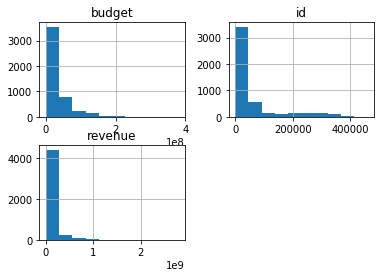

In [12]:
#the histograms show that majority of the movies did not have high budgets and also did not make a lot of revenue

df.hist()

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - What was the lowest and highest profit made for the movies in this dataset?

In [13]:
#calculating profit made for each of the movies in the dataset
#addition of a new column in the dataframe called 'Profit'

df['profit'] = df['revenue'] - df['budget']

#use the function 'idmin' to find the index of lowest and highest profit made

def find_minmax(a):
    highind = df[a].idxmax()
    minind = df[a].idxmin()
    top = pd.DataFrame(df.loc[highind,:])
    bottom = pd.DataFrame(df.loc[minind,:])
    
# Given list
    print("The Given list : ",df['profit'])

# use max
    res1 = max(df['profit'], key=lambda i: (isinstance(i, int), i))
    res2 = min(df['profit'], key=lambda i: (isinstance(i, int), i))
    return pd.concat([top,bottom],axis = 1)

# Result - print the movie with high and low profit
    print("The movie with the highest profit is : ",res1)
    print("The movie with the lowest profit is : ",res2)
find_minmax('profit')

The Given list :  0       2550965087
1        661000000
2        635674609
3        834939099
4         24139100
           ...    
4798       1820920
4799         -9000
4800             0
4801             0
4802             0
Name: profit, Length: 4803, dtype: int64


,0,13
budget,237000000,255000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
id,19995,57201
original_title,Avatar,The Lone Ranger
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."
release_date,2009-12-10 00:00:00,2013-07-03 00:00:00
revenue,2787965087,89289910
profit,2550965087,-165710090


Text(0.5,0,'Profit Index')

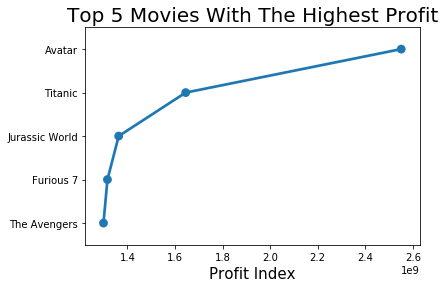

In [14]:
#These lines of code show the top 5 profitable movies for this dataset 


news = pd.DataFrame(df['profit'].sort_values(ascending = False))
news['original_title'] = df['original_title']
data = list(map(str,(news['original_title'])))
x = list(data[:5])
y = list(news['profit'][:5])

#plot using pointplot for top 5 profitable movies
mapplot = sns.pointplot(x=y,y=x)

#figure size
sns.set(rc={'figure.figsize':(10,5)})

#title and labels of the plot
mapplot.set_title("Top 5 Movies With The Highest Profit",fontsize = 20)
mapplot.set_xlabel("Profit Index",fontsize = 15)

Text(0.5,0,'Profit Index')

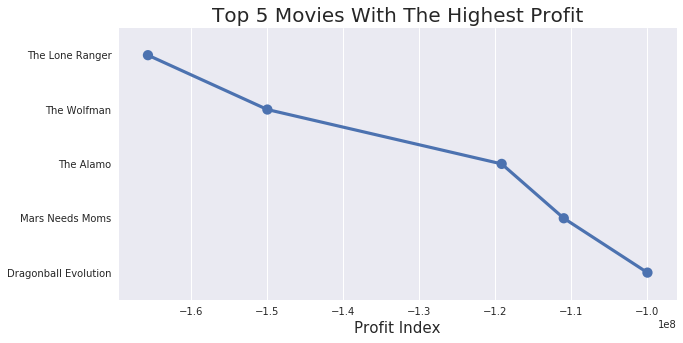

In [15]:
#These lines of code show the top 5 least profitable movies for this dataset 


news = pd.DataFrame(df['profit'].sort_values(ascending = True))
news['original_title'] = df['original_title']
data = list(map(str,(news['original_title'])))
x = list(data[:5])
y = list(news['profit'][:5])

#plot using pointplot for top 5 profitable movies
mapplot = sns.pointplot(x=y,y=x)

#figure size
sns.set(rc={'figure.figsize':(10,5)})

#title and labels of the plot
mapplot.set_title("Top 5 Movies With The Highest Profit",fontsize = 20)
mapplot.set_xlabel("Profit Index",fontsize = 15)

This analysis reveals that the lowest profit earned was '-165710090' for The Lone Ranger movie, which was a loss and the highest profit earned was '2550965087' for the Avatar movie. From the first graph, the top 5 profit earning movies are 'The Avengers', 'Furious 7', 'Jurassic World', 'Titanic' and 'Avatar'. The second graph shows that the 5 least profitable movies were 'The Lone Ranger', 'The Wolfman', 'The Alamo', 'Mars Needs Moms', and 'Drangonball Evolution'. 

### Research Question 2 - Which years had the highest revenue?

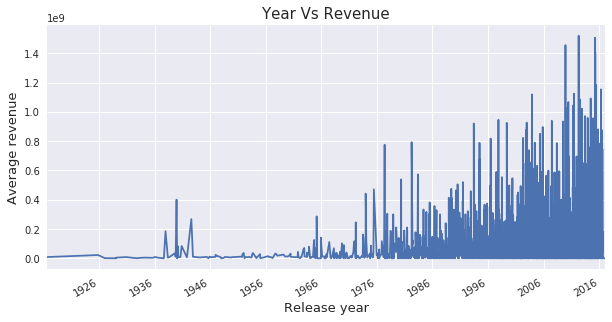

In [16]:
#Finding the years which had the highest revenue was done by grouping dates and revenues earned

df.groupby('release_date')['revenue'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year Vs Revenue",fontsize = 15)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average revenue',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

The above graph shows that from the year 2000 were the most profitable years.The profit was very low between the years 1920 and 1976.


<a id='conclusions'></a>
## Conclusions

I examined the TMDb movies dataset since 1960 based on revenue generated and budget allocated for each movie in the dataset. My analysis revealed that the lowest profit earned was '-165710090' for The Lone Ranger movie, which was a loss and the highest profit earned was '2550965087' for the Avatar movie.

Also, my analysis revealed that, from year 2000 were the most profitable years.The profit was very low between the years 1920 and 1976.

## Limitations

The analysis did not reveal why Avatar and The Lone Ranger performed that way thus, it would be good to know more about why it happened that way. It would be good to know what makes these movies good or bad to watch to generate such revenue, or make such a loss. 

Also, the literature for the dataset does not provide any information on why movie released after 2000 made higher revenue. It would also be good to explore that as well.

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0